# <font color='Blue'> This script is to process all the bathy soundings after 2008 for New York Bight </font>
## <font color='Green'> Data </font>
The data are from CSDL hydrographic survey database, provided by Cuong. The original NY Bight model was created in 2008 so it will make sense to only look at the bathymetry data after 2008 and update the model accordingly. There are new soundings from 2008 and 2016 with different coverage and density. 
## <font color='Green'> Results </font>
The bathymetry footstamp for eight years are plotted. 
### Inventory
Root: E:\VDATUM\Data\bathy

* Import all libraries

In [1]:
import os, matplotlib
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

* Set notebook settings

In [2]:
matplotlib.style.use('ggplot')
plt.close('all')
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows',25)

### Normalize colormap for each year

In [3]:
startYear = 2008
endYear = 2016
norm = matplotlib.colors.Normalize(vmin = startYear, vmax = endYear)
cmap = matplotlib.cm.get_cmap('Set1')
clrs = [[cmap(norm(y))] for y in range(startYear,endYear)]


In [9]:
# Load coastline
coastline = r'C:\Matlab_toolbox\surgeLAB\data\coastlines\usa.dat'
cst = pd.read_csv(coastline,delim_whitespace=True, names = ['Lon','Lat'],na_values = 'NaN')

In [10]:
# View data table
bathy.head()

,Survey_ID,Calculated_Lat,Calculated_Lon,Original_Depth,End_year,V_Datum
0,F00654,41.544979,-70.886967,10.62,2015,MLLW
1,F00654,41.443848,-70.967741,20.75,2015,MLLW
2,F00654,41.447585,-70.953513,27.26,2015,MLLW
3,F00654,41.449420,-70.960008,27.26,2015,MLLW
4,F00654,41.448771,-70.960575,27.97,2015,MLLW


### Processing bathymetry soundings

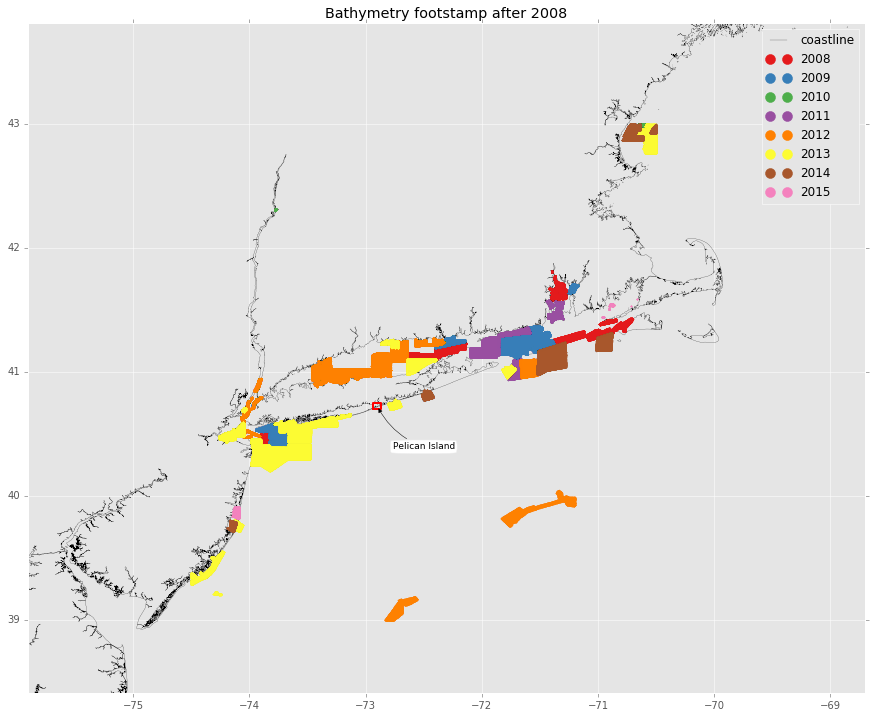

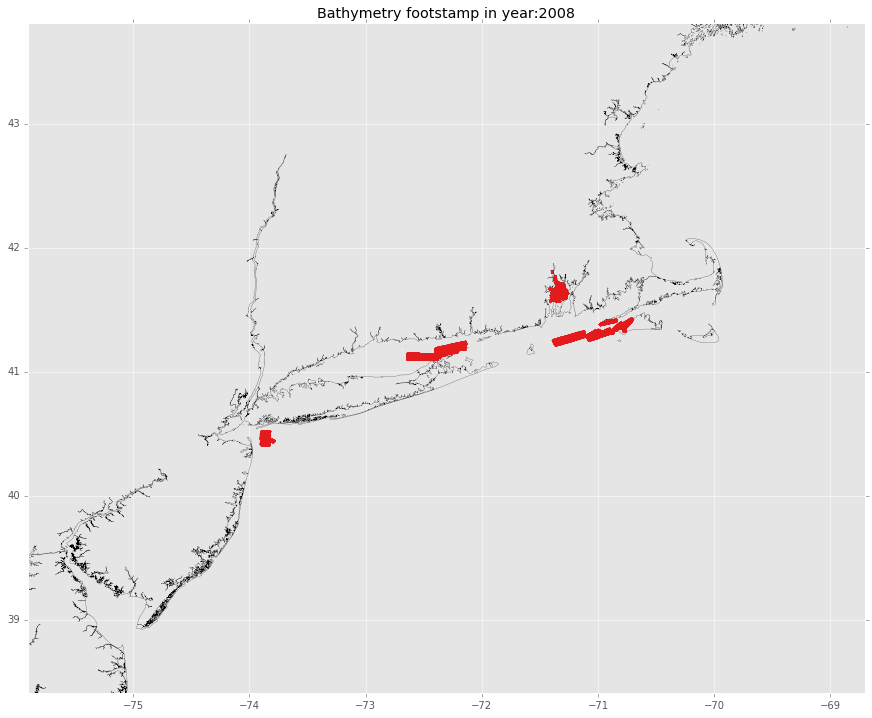

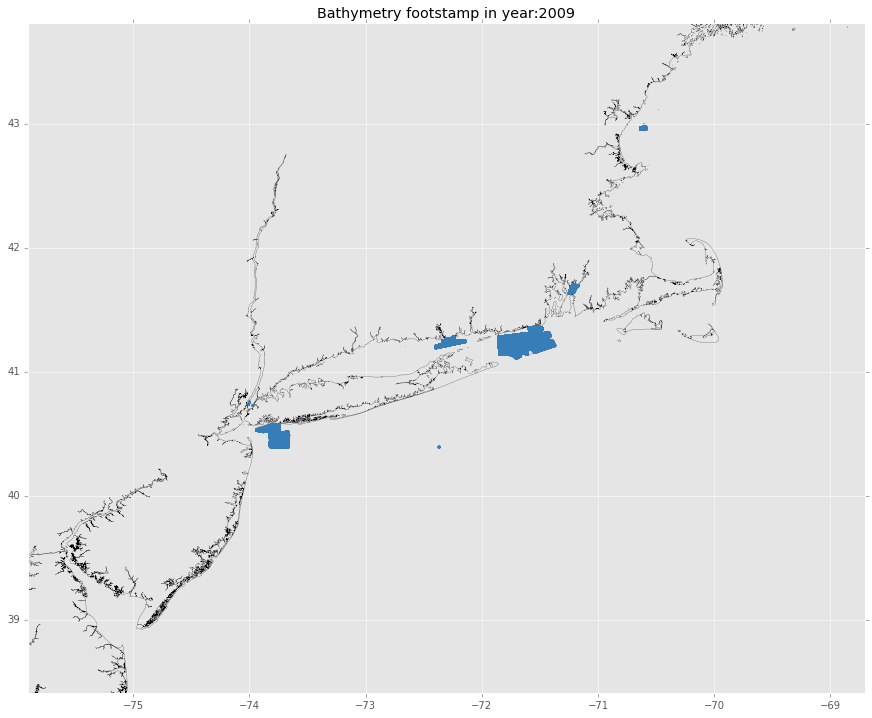

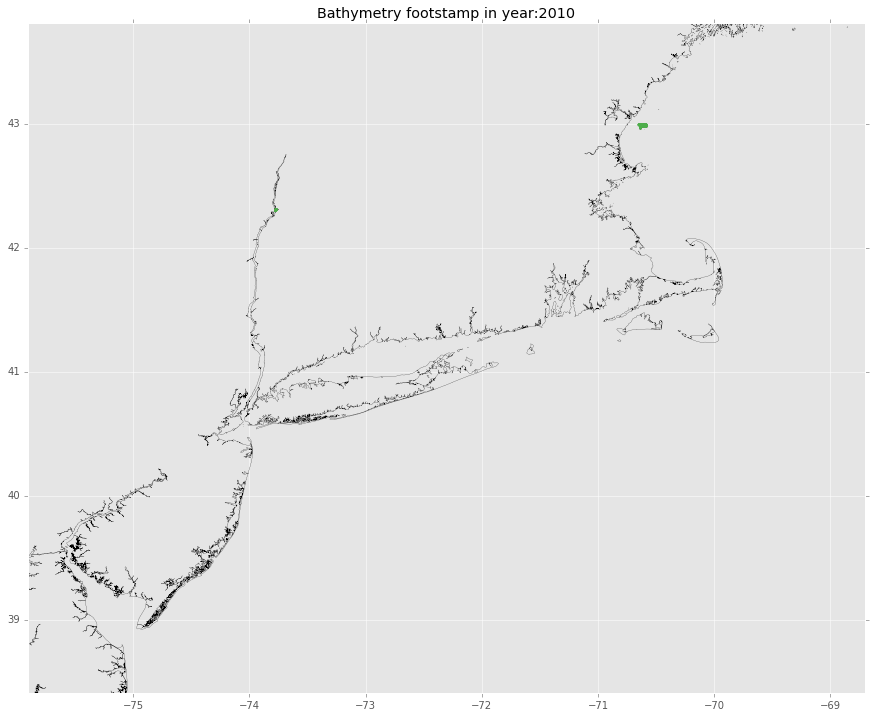

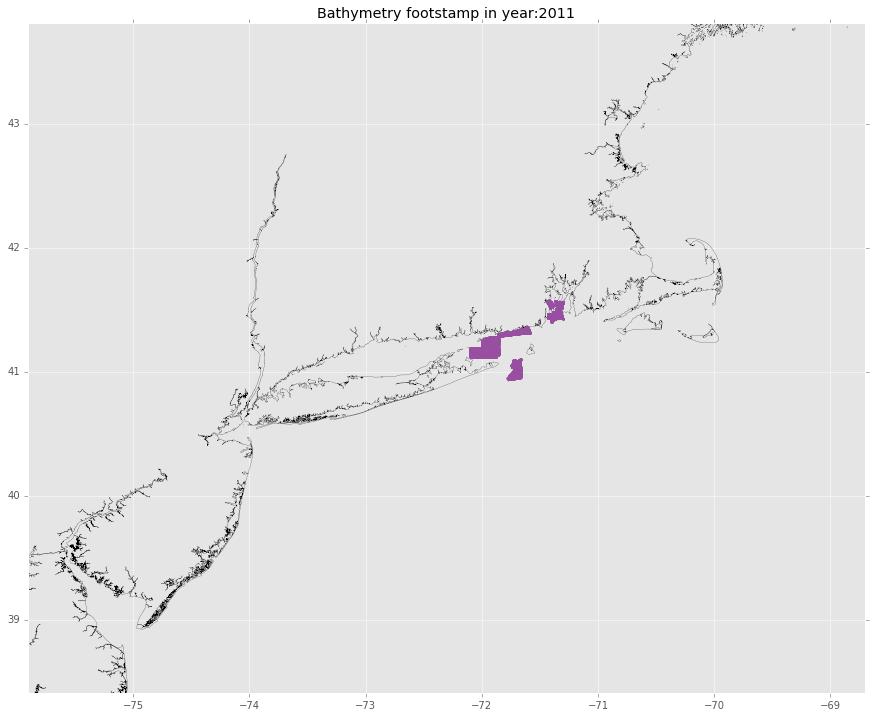

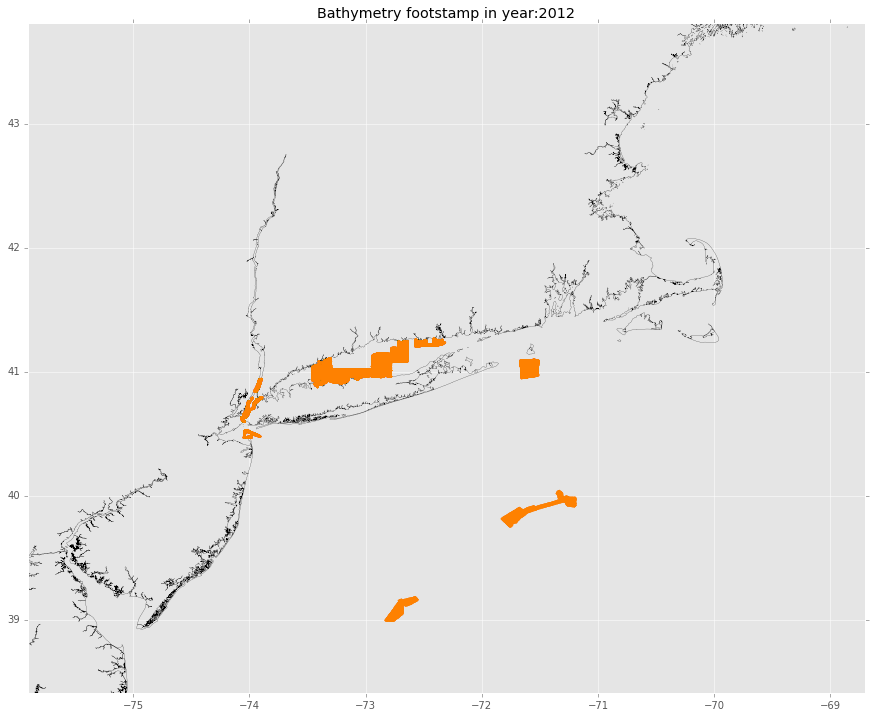

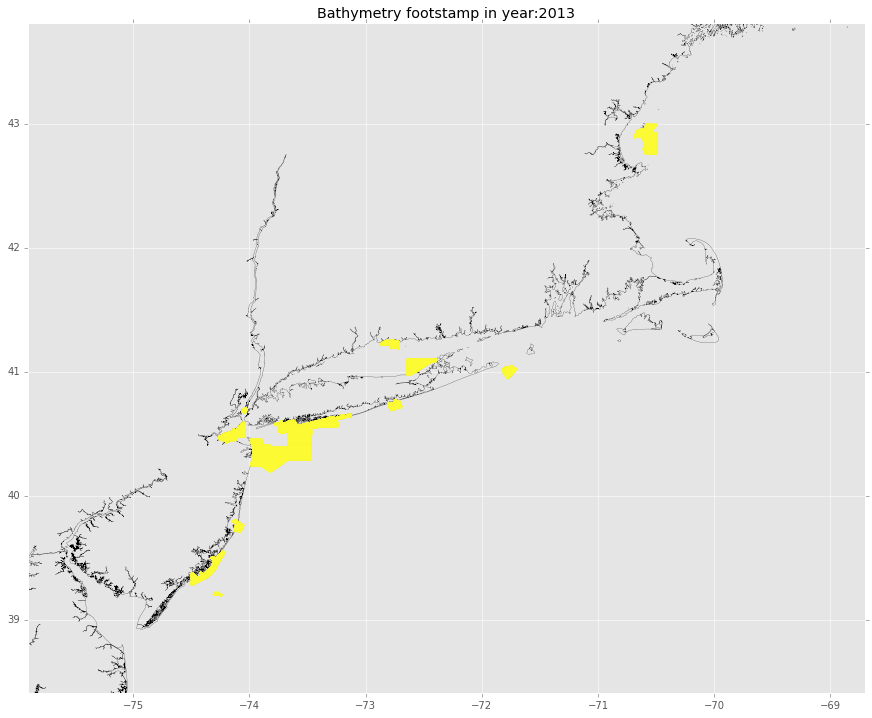

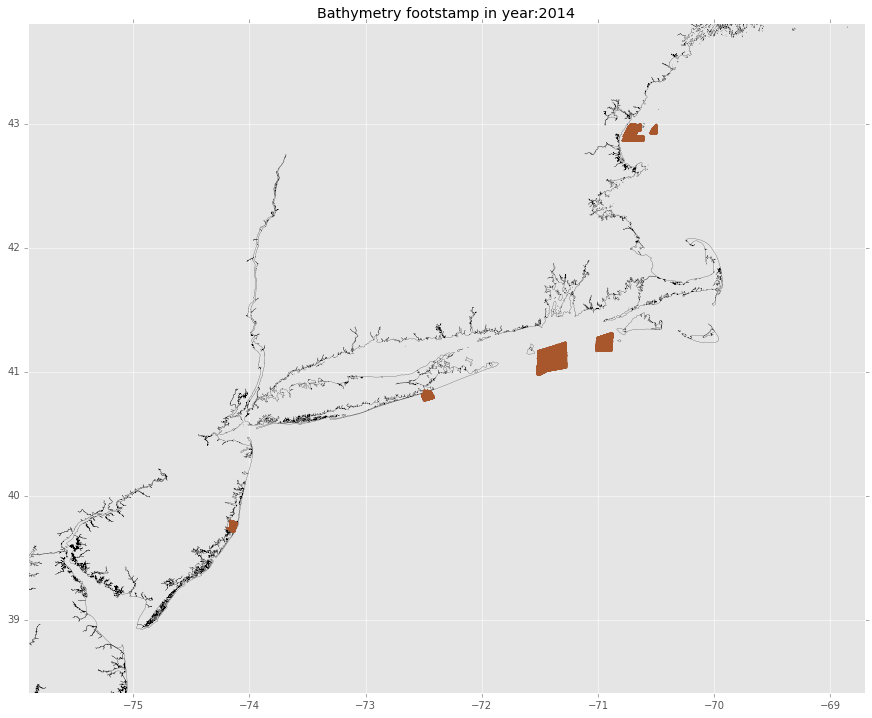

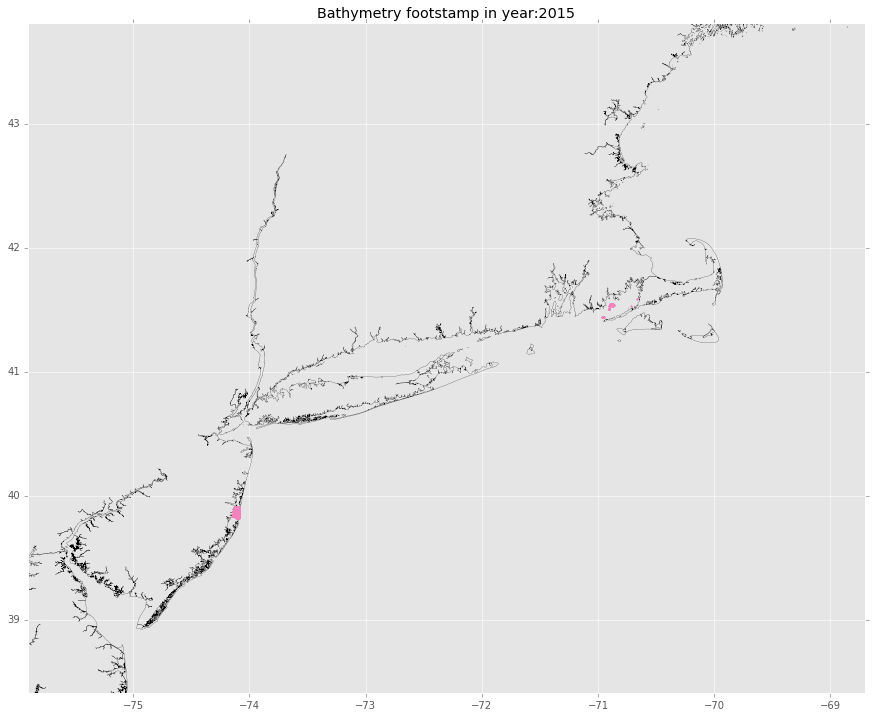

In [5]:
baseDir = r'E:\VDATUM\Data\bathy'
[maxx,maxy] =[-999,-999]
[minx,miny] =[999,999]
buffer = 2
bathy = pd.DataFrame()
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,12),dpi=300)
ax.plot(cst.Lon, cst.Lat, linewidth = 0.2, color='k', label='coastline')
for year in range(startYear,endYear,1):
    fig1,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(15,12),dpi=300)
    ax1.plot(cst.Lon,cst.Lat, linewidth=0.2,color='k',label='coastline')
    try:
        filename = os.path.join(baseDir,str(year)+'.csv') 
        colNames = ['Survey_ID','Calculated_Lat','Calculated_Lon','Original_Depth','End_year','V_Datum']
        bathy = pd.read_csv(filename,header=None, names = colNames,skipinitialspace = True ,skip_blank_lines = True,
                           warn_bad_lines = True, skipfooter = 2, engine = 'python', converters = {-1: lambda s: s.strip()})
        ax1.plot(bathy['Calculated_Lon'], bathy['Calculated_Lat'],  linewidth = 0.01, linestyle='',
                marker='o',markersize=1,mfc=clrs[year-startYear][0][0:3], mec= clrs[year-startYear][0][0:3],label=str(year)) 
        #bathy = bathy.append(bathy_single,ignore_index=True)
                       
#concatFileName = os.path.join(baseDir,str(startYear)+'to'+str(endYear)+bathy.V_Datum[0]+'.csv')
#bathy.to_csv(concatFileName,sep=',',index = False,float_format='%.6f', columns = ['Calculated_Lon','Calculated_Lat','Original_Depth'] )                   
        ax.plot(bathy['Calculated_Lon'], bathy['Calculated_Lat'],  linewidth = 0.01, linestyle='',
                marker='o',markersize=1,mfc=clrs[year-startYear][0][0:3], mec= clrs[year-startYear][0][0:3],label=str(year))                       
        if(bathy.Calculated_Lon.min()< minx):
            minx = bathy.Calculated_Lon.min() - buffer
        if(bathy.Calculated_Lat.min() < miny):
            miny = bathy.Calculated_Lat.min()- buffer
        if(bathy.Calculated_Lon.max()> maxx):
            maxx = bathy.Calculated_Lon.max()+ buffer
        if(bathy.Calculated_Lat.max() > maxy):
            maxy = bathy.Calculated_Lat.max()+ buffer
        ax1.set_xlim([minx,maxx])
        ax1.set_ylim([miny,maxy])    
        ax1.set_title('Bathymetry footstamp in year:' + str(year))     
        picname1 = os.path.join(baseDir,'Z_individual_bathymetry_footstamp_'+str(year)+'.png')
        plt.savefig(picname1,dpi=300)
    except:
        pass
    
ax.set_xlim([minx,maxx])
ax.set_ylim([miny,maxy])    
ax.set_title('Bathymetry footstamp after ' + str(startYear))      
ax.legend(markerscale=10)
#plot a special interest box
ax.plot([-72.932159,-72.865965,-72.865965,-72.932159,-72.932159],
        [40.708575,40.708575,40.754674,40.754674,40.708575],'r-',linewidth=2)
ann = ax.annotate("Pelican Island",
                  xy=(-72.896960,40.724810), xycoords='data',
                  xytext=(-72.5, 40.4), textcoords='data',
                  size=9, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="black",ec='black'), 
                  )          

### Save plots

In [6]:
picname = os.path.join(baseDir,'individual_bathymetry_footstamp_'+str(startYear)+'to'+str(endYear)+'.png')
plt.savefig(picname,dpi=400)


# Done.